In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Finding ring atoms/bonds

In [7]:
from my_mychem import *

In [25]:
m=Molecule.from_smiles("c1occ(NC(F)(F)F)c1N(O)C")
#m=Molecule.from_smiles("c1ccccc1c2ccccc2")
#m=Molecule.from_smiles("C(CN(O)CC)N(OC(N)(S)O)CNC")

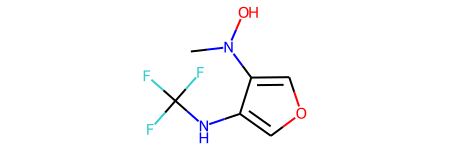

In [26]:
m.to_rdkit()

In [35]:
def dfs(root,path=None,visited=None,parent=None,ring_atoms=None):
    if visited is None:
        visited=set()
    if path is None:
        path=[]
    if ring_atoms is None:
        ring_atoms = set()
    print(root)
    visited.add(root)
    path.append(root)
    for nbor in root.get_neighbors():
        if nbor!=parent:
            if nbor not in visited:
                dfs(nbor,path,visited,root,ring_atoms)
            else:
                if nbor in path:
                    ring_atoms.update(path[path.index(nbor):])
    path.pop()
    return ring_atoms
dfs(m.get_atoms()[0])

In [36]:
dfs(m.get_atoms()[0])

O
CH1
C
N
CH3
OH1
C
NH1
C
F
F
F
CH1


{<C>, <C>, <CH1>, <CH1>, <O>}

In [57]:

def dfs(root,path=None,visited=None,ring_atoms=None,ring_bonds=None):
    if path is None:
        path = []
    if visited is None:
        visited = set()
    if ring_atoms is None:
        ring_atoms = set()
    if ring_bonds is None:
        ring_bonds = set()
        
    if root in visited:
        return
    
    if root in path:
        #print(root,path)
        cycle=path[path.index(root):]
        for atom in cycle:
            ring_atoms.add(atom)
        cycle_successor = cycle[1:]+cycle[:1]
        for a,b in zip(cycle,cycle_successor):
            ring_bonds.add(a.get_bond(b))
    else:
        parent = path[-1] if path else None
        path.append(root)
        for nbor in root.get_neighbors():
            if nbor != parent:
                dfs(nbor,path,visited,ring_atoms,ring_bonds)
        path.pop()
    visited.add(root)
    
    return ring_atoms,ring_bonds

In [59]:
ra,rb=dfs(m.get_atoms()[0])

In [60]:
ra,rb

({<C>,
  <C>,
  <CH1>,
  <CH1>,
  <CH1>,
  <CH1>,
  <CH1>,
  <CH1>,
  <CH1>,
  <CH1>,
  <CH1>,
  <CH1>},
 {<C:CH1>,
  <C:CH1>,
  <CH1:C>,
  <CH1:C>,
  <CH1:CH1>,
  <CH1:CH1>,
  <CH1:CH1>,
  <CH1:CH1>,
  <CH1:CH1>,
  <CH1:CH1>,
  <CH1:CH1>,
  <CH1:CH1>})

In [61]:
rbs = set()
from itertools import combinations
for a,b in combinations(ra,2):
        bd=a.get_bond(b)
        if bd is not None:
            rbs.add(bd)

In [62]:
rbs

{<C-C>,
 <C:CH1>,
 <C:CH1>,
 <CH1:C>,
 <CH1:C>,
 <CH1:CH1>,
 <CH1:CH1>,
 <CH1:CH1>,
 <CH1:CH1>,
 <CH1:CH1>,
 <CH1:CH1>,
 <CH1:CH1>,
 <CH1:CH1>}

In [11]:
m.get_atoms()

[<O>, <CH3>, <C>, <CH1>, <NH1>, <C>, <OH1>, <C>, <F>, <N>, <CH1>, <F>, <F>]

In [13]:
class Example:
    
    def __init__(self,h,m,s):
        self._h = h
        self._m = m
        self._s = s
        
    def total_time(self):
        self._in_seconds = self._h*3600 + self._m*60+self._s
        return self._in_seconds

In [19]:
ex=Example(2,13,45)

In [20]:
ex._in_seconds

AttributeError: 'Example' object has no attribute '_in_seconds'

In [21]:
ex.total_time()

8025

In [22]:
ex._in_seconds

8025

In [53]:
from rdkit import Chem

In [37]:
m._ring_atoms

{<C>, <C>, <CH1>, <CH1>, <O>}

In [39]:
mol,mapping=m.to_rdkit_with_map()

In [1]:
mol

NameError: name 'mol' is not defined

In [41]:
rdkit_ring_atoms=[mapping[ra] for ra in m._ring_atoms]

In [49]:
rdkit_ring_atoms

[0, 1, 8, 6, 7]

In [51]:
mol.__sssAtoms=rdkit_ring_atoms

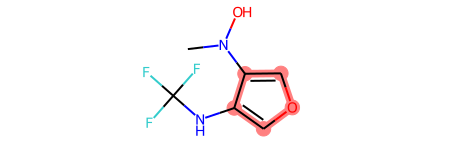

In [53]:
mol